In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

---

## 1. Prepare train & test data (MNIST)

### Train & Test split

In [2]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

---
### Normalization

In [3]:
train_data = train_data.reshape(60000, -1) / 255.0
test_data = test_data.reshape(10000, -1) / 255.0

---
### One-hot Encoding

In [5]:
train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

---

## 2. Build the model & Set the criterion

In [6]:
model = models.Sequential()

model.add(layers.Dense(input_dim=28*28, units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.BatchNormalization()) ## 각 batch에 해당하는 normalization
model.add(layers.Activation('relu'))

model.add(layers.Dropout(rate=0.2))


model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=10, activation='softmax'))

In [7]:
model.compile(optimizer=optimizers.Adam(0.001),
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

---

## 3. Train the model

In [9]:
history = model.fit(train_data, train_label, batch_size=100, epochs=15, validation_split=0.2)

Epoch 1/15
480/480 [==============================] - 2s 3ms/step - loss: 0.3030 - categorical_accuracy: 0.9095 - val_loss: 0.1302 - val_categorical_accuracy: 0.9611
Epoch 2/15
480/480 [==============================] - 1s 3ms/step - loss: 0.1384 - categorical_accuracy: 0.9577 - val_loss: 0.0998 - val_categorical_accuracy: 0.9698
Epoch 3/15
480/480 [==============================] - 2s 3ms/step - loss: 0.1024 - categorical_accuracy: 0.9665 - val_loss: 0.0889 - val_categorical_accuracy: 0.9722
Epoch 4/15
480/480 [==============================] - 2s 3ms/step - loss: 0.0849 - categorical_accuracy: 0.9739 - val_loss: 0.0771 - val_categorical_accuracy: 0.9770
Epoch 5/15
480/480 [==============================] - 1s 3ms/step - loss: 0.0700 - categorical_accuracy: 0.9779 - val_loss: 0.0806 - val_categorical_accuracy: 0.9763
Epoch 6/15
480/480 [==============================] - 1s 3ms/step - loss: 0.0612 - categorical_accuracy: 0.9799 - val_loss: 0.0705 - val_categorical_accuracy: 0.9805
Epoc

---
## 4. Test the model

In [12]:
result = model.evaluate(test_data, test_label)#, batch_size=100)

print('loss (cross-entropy): ', result[0])
print('test accuracy: ', result[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.0658 - categorical_accuracy: 0.9812
loss (cross-entropy):  0.06577032059431076
test accuracy:  0.9811999797821045


In [13]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy): ', result[0])
print('test accuracy: ', result[1])

100/100 [==============================] - 0s 1ms/step - loss: 0.0658 - categorical_accuracy: 0.9812
loss (cross-entropy):  0.06577029079198837
test accuracy:  0.9811999797821045


---

## 5. Visualize the result

In [14]:
history

In [15]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

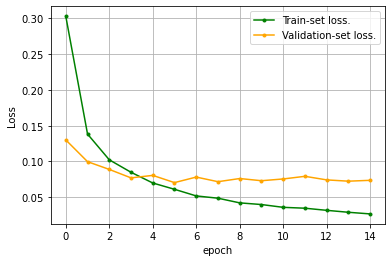

In [16]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

val_loss = history.history['val_loss']
loss = history.history['loss']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
# plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
# plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.plot(x_len, loss, marker='.', c='green', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='orange', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()